# Histograma

Permite ver la distribucion empirica de una variable continua. En python se hace con matplotlib 
plt.histplot()

# Datos perdidos

Son los datos nulos, y los obtienen con .isnull()

# Variables aleatorias

Es una funcion que mapea un resultado de un espacio muestral discreto (resultados de un dado, azul,
 rojo, etc) a uno de numeros.

# Distribucion Normal

Se define con la media y la desviacion estandar, y se puede crear completamente. Se puede ver la 
funcion de densidad y la funcion acumulada. 

La probabilidad de obtener solamente un unico valor en la distribucion normal es 0!. Sin embargo, 
si uno pregunta por un rango, ahi si se obtiene una probabilidad.

# Transformacion de datos

Algunos datos no obedecen a una distribucion normal. Debido a lo anterior, estos se trasnforman
mediante una funcion (Ej: Logaritmo, 1/x, etc) y usualmente se obtiene una distribucion normal.

# Distribucion normal estandarizada

Cualquier distribucion normal (independiente de su media o desviacion estandar) se puede transformar
a una distribucion normal estandarizada.

# Puntaje Z

Permite analizar el comportamiento especifico de una observacion con respecto a la media y
desviacion estandar. Se calcula con:

z = (obs - media) / desv estandar

Permite detectar outliers! Y permite homogenizar variables y compararlas entre si.

# Variables aleatorias discretas

La mas importante es la distribucion binomial. Nos permite resumir una variable discreta segun
el conteo y la frecuencia de los eventos. 

## Ensayo de Bernoulli

Es solamente una iteracion, y el evento debe ser binario (si/no, cara/sello, etc). No entendi muy
bien esto la verdad. Se tiene mu y sigma. En scipy.stats se puede obtener a mu (media) y sigma 
(std), requiere solamente 1 valor. 1 ensayo bernoulli es lanzar 1 vez 1 moneda. 2 ensayos bernoulli
es lanzar 2 veces 1 moneda (y ambos eventos son independientes).

In [1]:
from scipy.stats import bernoulli

# La funcion bernoulli recibe mu
mu, sigma = bernoulli.stats(0.7)

# Binomial

Con np.random.binomial se pueden simular ensayos bernoulli. La binomial converge a la distribucion
normal!

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Size corresponde a la cantidad de experimentos, o puntos que se van a graficar 
# n es la cantidad de eventos que se van a realizar dentro de cada experimento (cada experimento tendra 1000 lanzadas de monedas)


# Size: Cantidad de datos a simular
# n: Cantdad de eventos que ocurren en cada ensayo/experimento
np.random.binomial(size=1, n=1000, p=0.8)

# un ensayo bernoulli es un caso especial de la binomial, ya que es cuando dentro de un experimento
# se realiza solamente un unico evento

array([811])

(array([   3.,   32.,  145.,  664., 1755., 2809., 2641., 1470.,  429.,
          52.]),
 array([62. , 65.1, 68.2, 71.3, 74.4, 77.5, 80.6, 83.7, 86.8, 89.9, 93. ]),
 <BarContainer object of 10 artists>)

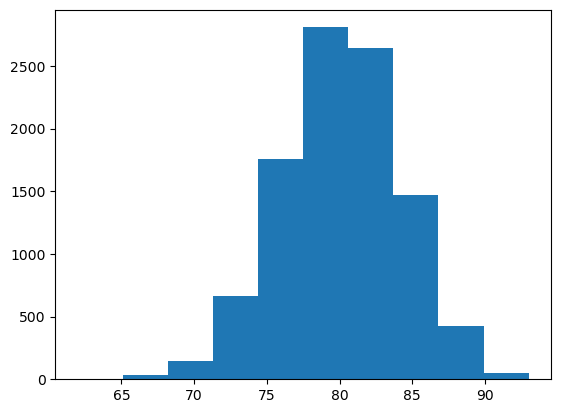

In [3]:
# En este caso, serian 100 monedas distintas, donde cada una se tira 100 veces, y la probabilidad
# de que se obtenga cara es del 80%. En terminos estadisticos, es probable que en cada experimento
# se obtengan alrededor de 80 caras!.
x = np.random.binomial(size=10000, n=100, p=0.8)
plt.hist(x)

(array([  38.,  260.,  851., 2549., 2590., 2169., 1229.,  225.,   79.,
          10.]),
 array([15. , 18.3, 21.6, 24.9, 28.2, 31.5, 34.8, 38.1, 41.4, 44.7, 48. ]),
 <BarContainer object of 10 artists>)

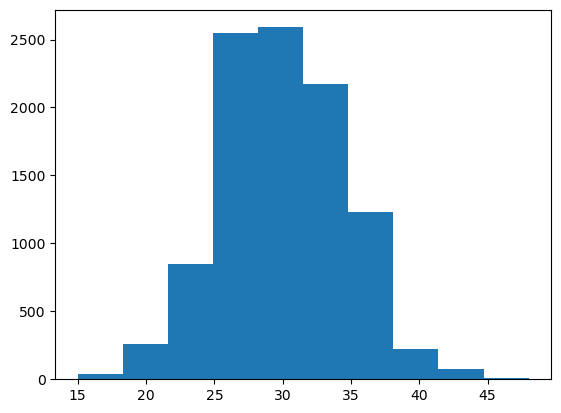

In [4]:
# Si uno cambia la probabilidad del evento, entonces la distribucion normal cambia su eje x.
# En el caso anterior, es mas probable que la cantidad de las caras sea cerca del 30% (y asi cambia
# el grafico)
x = np.random.binomial(size=10000, n=100, p=0.3)
plt.hist(x)

# Asintotico

Esto significa que el tamano de la muestra tiende a infinito (un numero infinito de experimentos/
monedas por tirar, o numero de eventos por experimento).

# Ley de los grandes numeros

Entre mas datos/experimentos se hagan, entonces mas se acercara la media empirica a la media
teorica. Si tengo infinitos ensayos (asintoticamente), entonces la media empirica sera la media
teorica!

# Teorema del Limite Central

Es super central para la inferencia estadistica, pero ni idea que weas. Si tenemos un promedio y le
restamos la media y lo dividimos por la desv estandar/la cantidad de experimentos, entonces eso
tiende a una distribucion normal!

Ej:


```python
mu, sigma = bernoulli.stats(0.65)

tamano_muestra = 100
ensayos = np.random.binomial(size=tamano_muestra, n=1, p=0.65)

calculo_limite_central = (np.mean(ensayos) - mu) / (np.std(ensayos) / tamano_muestra)

```

# Seaborn

Permite centrarse mas en el analisis que en escribir el codigo!

## Graficar histogramas

- Se hace con sns.distplot(). Si se agrega el argumento rug, entonces se agregan los datos que se estan graficando!. Lo fome es que se va a dejar de utilizar. Por lo tanto, es mejor graficar un histplot y un kdeplot en un mismo eje

## Subplots

# Correlaciones - Relacion entre variables

Recordemos que la correlacion no tiene nada que ver con la causalidad!. Puede que dos variables
esten correlacionadas, pero que no tengan causalidad. 

# Test de Hipotesis - Rechazo o No rechazo hipotesis



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import lec4_graphs

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
df = pd.read_csv('qog_std_cs_jan18.csv')

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

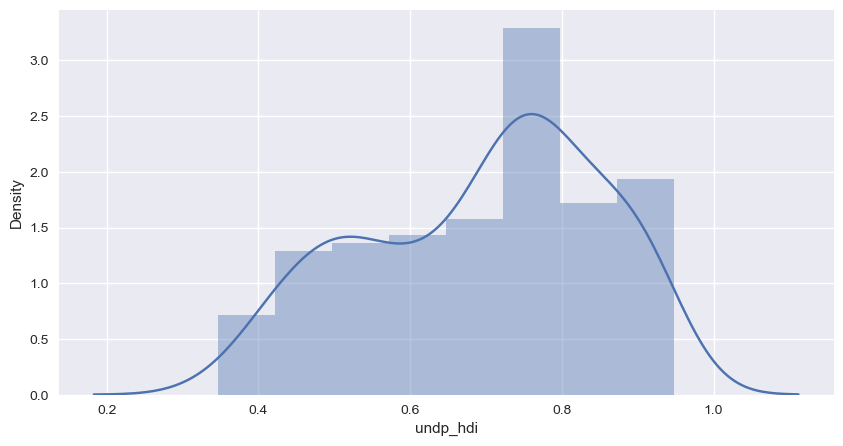

In [7]:
sns.distplot(df['undp_hdi'])

<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

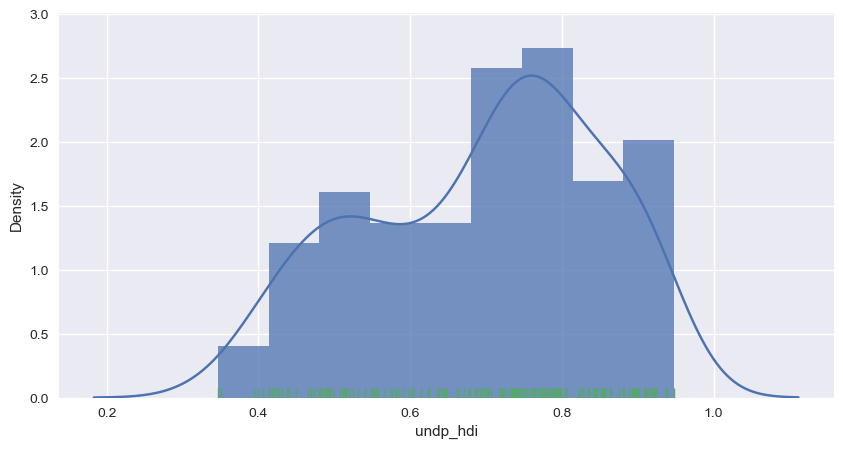

In [8]:
fig, axis = plt.subplots()
sns.histplot(df['undp_hdi'].dropna(), stat='density', ax=axis, lw=0)
sns.kdeplot(df['undp_hdi'].dropna(), ax=axis)
sns.rugplot(df['undp_hdi'].dropna(), ax=axis)

# Conteo de frecuencias

Con seaborn se puede hacer con la funcion sns.countplot(). Con el parametro order se pueden ordenar los datos!

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cname', ylabel='count'>

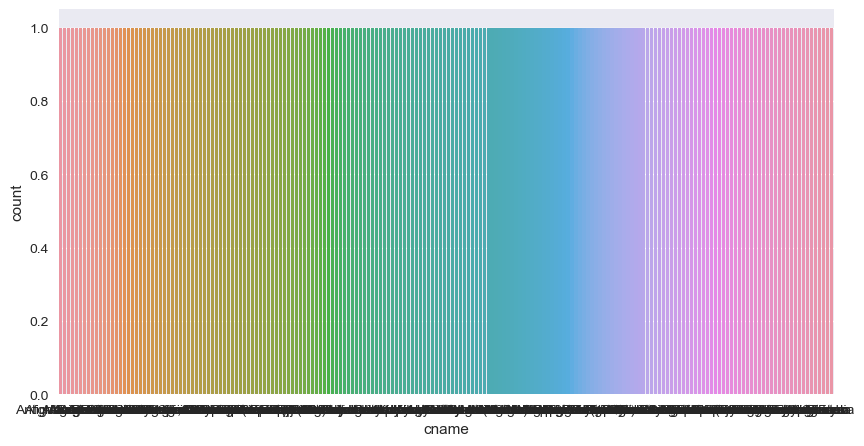

In [9]:
sns.countplot(df['cname'])

# Swarm plot

Se hacen con sns.swarmplot(x, y, hue)

# Facet Grid

Permite graficar multiples figuras condicional a un valor en especifico. Al final es hacer grillas
o subplots

1. Primero se inicializa el FacetGrid

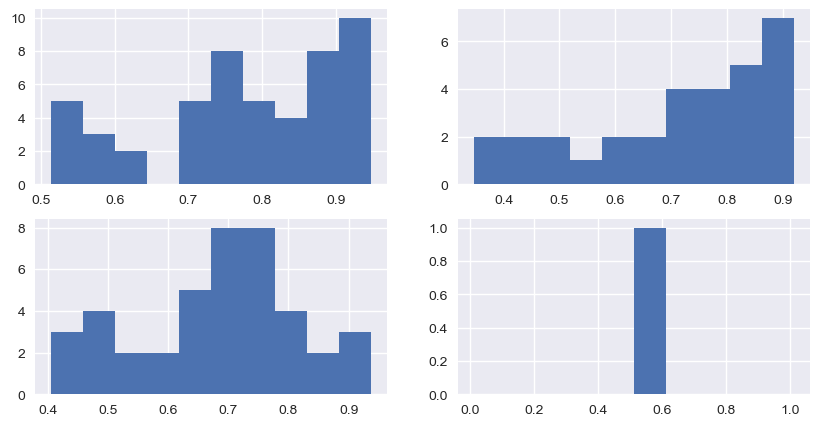

In [10]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

variables = [gol_0, gol_1, gol_2, gol_4]

for indice, serie in enumerate(variables):
    plt.subplot(2, 2, indice + 1)
    plt.hist(serie)



# FacetGrid con Seaborn

Hay que inicializar la FacetGrid, luego darle la variable que queremos que se grafique en la grid.
Al final hay que generar las grillas que se quieren graficar, y luego la funcion y los datos que
se quieren graficar

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


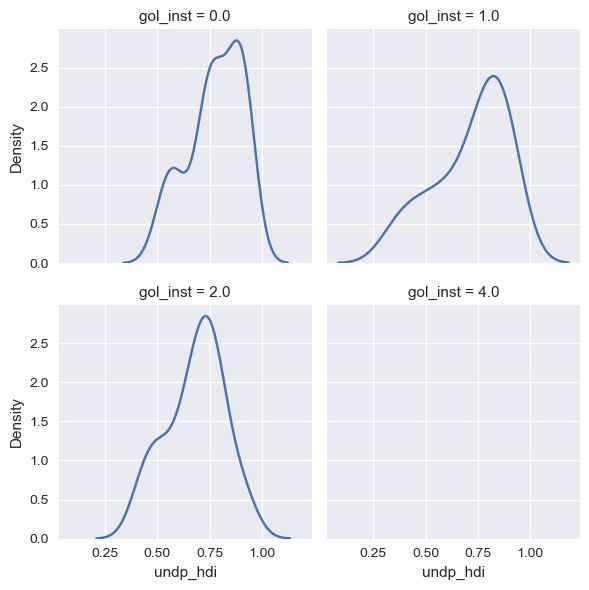

In [11]:
grid = sns.FacetGrid(df, col='gol_inst', col_wrap=2)
grid.map(sns.kdeplot, 'undp_hdi')

# Scatter Plot

Permite ver la relacion o correlacion entre dos variables! Podemos ver que tan juntas van dos
variables

Text(0.5, 1.0, 'Calidad del gobierno en funcion del indice de desarrollo humano')

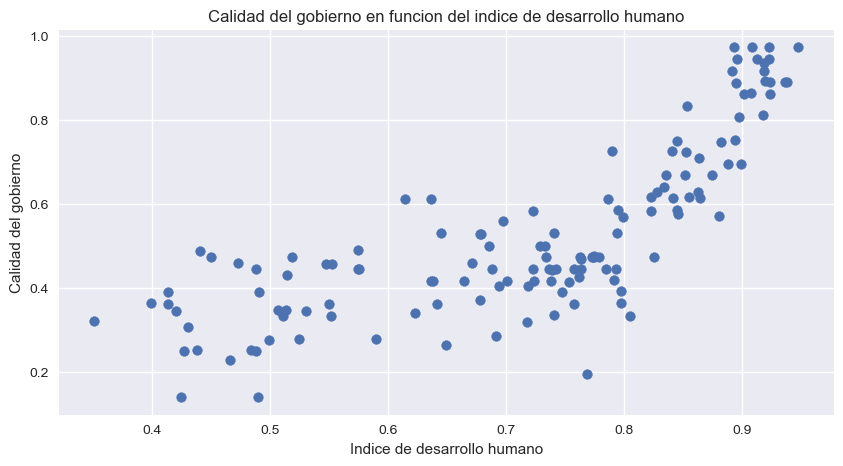

In [12]:
# Aqui se relaciona el indice de desarrollo humano en X, y la calidad del gobierno en el eje Y
plt.scatter(df['undp_hdi'], df['icrg_qog'])
plt.ylabel('Calidad del gobierno')
plt.xlabel('Indice de desarrollo humano')
plt.title('Calidad del gobierno en funcion del indice de desarrollo humano')

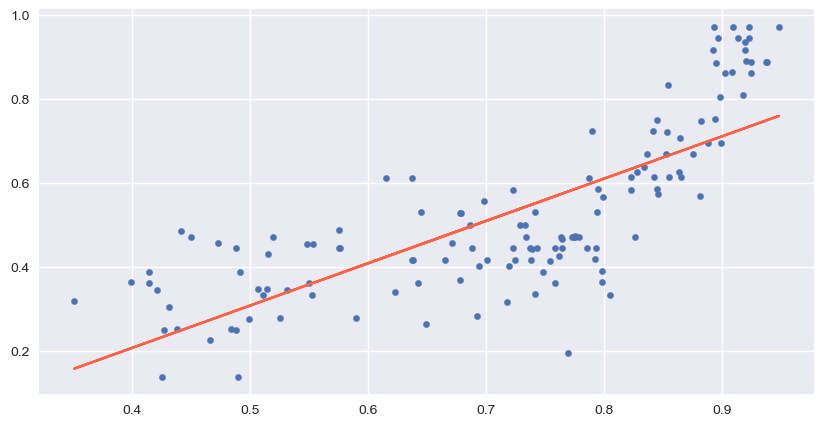

In [13]:
scatter_data = df[['undp_hdi', 'icrg_qog', 'ccodealp']].dropna().copy()
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker='o', s=20)

pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)\
# O tambien , para hacer la recta

valores_y = [(pendiente * x) + intercepto for x in scatter_data['undp_hdi']]
ax.plot(scatter_data['undp_hdi'], valores_y, color='tomato')


# for i in scatter_data.index:
#     ax.text(
#         x=scatter_data.loc[i, 'undp_hdi'],
#         y=scatter_data.loc[i, 'icrg_qog'],
#         s=scatter_data.loc[i, 'ccodealp']

#     )


# Como hacer un ScatterPlot con la regresion lineal en Seaborn

Se hace con sns.jointplot(x, y, kind='reg')

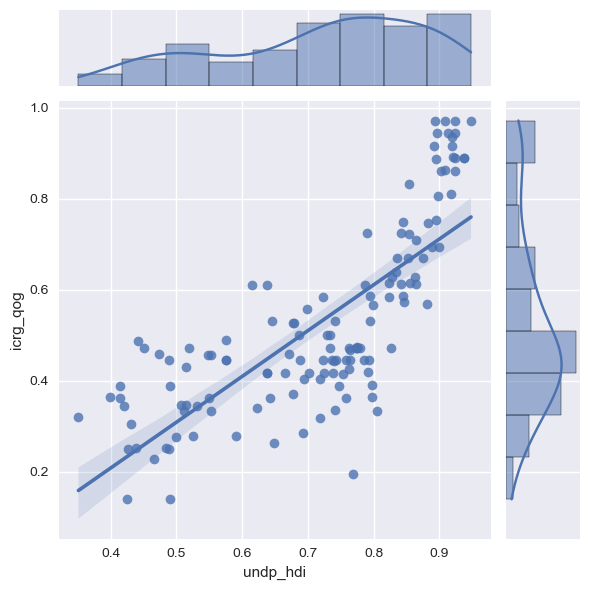

In [14]:
sns.jointplot(
    x=scatter_data['undp_hdi'],
    y=scatter_data['icrg_qog'],
    kind='reg'
)

# Boxplots

Permiten separar los datos en cuartiles, y permite ver los outliers. Recordar que los valores de
los cuartiles son: minimo, Q1 (25%), Q2 o Mediana (50%), Q3 (75%) y Maximo (100%).

## Con Matplotlib

- Para calcular los cuartiles 
```python
np.quantile(df['undp_hdi'], 0.25)
```

## Con pandas


- Para calcular los cuartiles
```python
q0, q1, q2, q3, q5 = df['undp_hdi'].quantile([0, 0.25, 0.5, 0.75, 1])
```

De los graficos de caja y bigotes, recordar que la el bigote superior e inferior se calculan
de la siguiente manera:

Q1 - 1.5 * Rango Inter Cuartil
Q3 - 1.5 * Rango Inter Cuartil. 

Si cualquier valor esta mas alla de estos valores, entonces son considerados outliers.

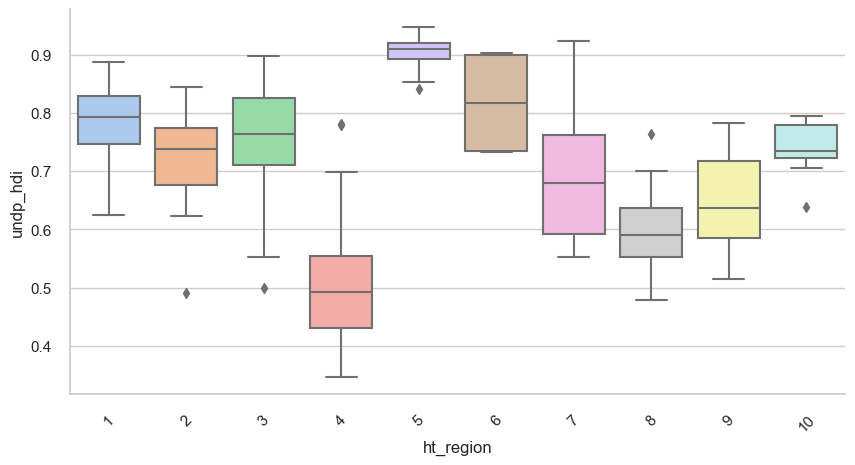

In [15]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.boxplot(data=df, x='ht_region', y='undp_hdi')
plt.xticks(rotation=45)
sns.despine()

# Correlacion lineal y covarianza

La correlacion permite ver como se relacionan dos variables entre si.

La **correlacion** es: Covarianza / desv std (x) * desv std (y)

Y la **covarianza** es la multiplicacion de varianzas de las dos variables por separado, partido
la cantidad de datos en total:

- Una correlacion de -1 significa que cuando x sube, y baja a la misma escala.
- Una correlacion de 1 significa que cuando x sube, y sube a la misma escala.

**Pandas**: Con pandas se puede obtener la matriz de correlacion entre variables

```python
df.corr()
```


# Heatmaps

Permite graficar una matriz de correlacion entre variables. Se hace con:

```python
sns.heatmap(df.corr(), annot=True)
```

In [20]:
columnas_wvs = [col for col in df.columns if 'wvs' in col]
df_wvs = df[columnas_wvs]

<AxesSubplot:>

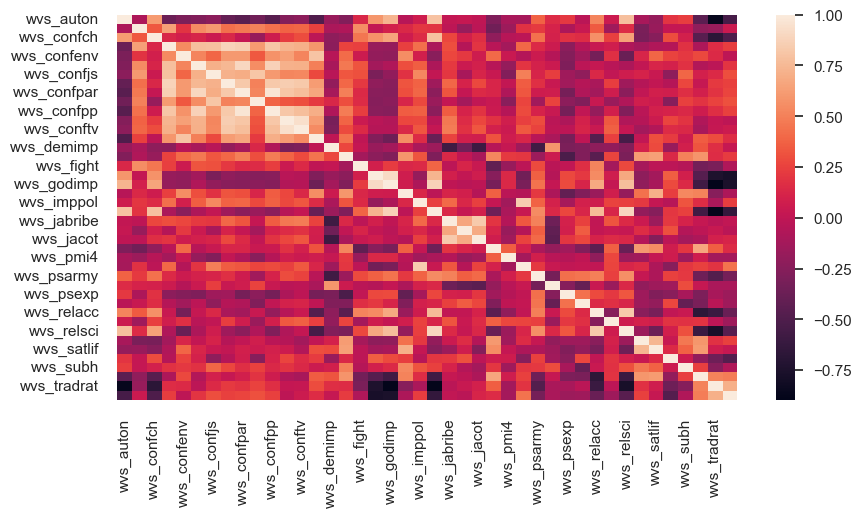

In [21]:
matriz_total = df_wvs.corr()
sns.heatmap(matriz_total)

# Formar de visualizar correlaciones: PairGrid

```python
grid = sns.PairGrid(df_wvs.iloc[:, 0:4])
grid = grid.map_upper()
grid = grid.map_lower()
```


# Hipotesis

Permite tomar decisiones o esclarecer juicios

## Como hacer una hipotesis

1. Definir la hipotesis:

      - Hipotesis nula: Hipotesis que establece lo que creemos/queremos testear
      - Hipotesis alternativa: Hiptoesis que establece que nuestra hipotesis nula no es correcta

Por ejemplo:

**Objetivo:** Se cree que la correlacion entre la variable a y b es de 0.7

   - Hipotesis nula: La relacion entre la variable a y b es 0.7
   - Hipotesis alternativa: La relacion entre la variable a y b NO es 0.7

2. Calcular estadisticos de prueba:

Se calcula el valor Z estimador de la hipotesis:

Z = (Estimador Muestral - Estimador Muestral) / Error / std(Cantidad datos)



# Calcular estadisticos de prueba en Python

Por ejemplo, para calcularselo a la variable wvs_trust. Numpy lo hace solo

In [22]:
trust = df['wvs_trust'].dropna().copy()
diff = trust.mean() - 0.7 # El 0.7 es el valor que se quiere testear (es la hipotesis nula)
diff

-0.46479472043636355

In [23]:
error_std = np.sqrt(
    np.var(trust, ddof=1) / float(trust.shape[0])
)

error_std

0.0219584530263424

In [25]:
estadistico = diff / error_std
estadistico

-21.167006613752516

In [26]:
# Como hacerlo con numpy en 1 linea. Hace un test de t estadistico

stats.ttest_1samp(trust, 0.7)

# Aqui se obtiene el valor que toma nuestra hipotesis 0.7. Entonces, tu muestra se situa en el
# valor -21, que tiene una probabilidad de p. Este valor es MUUUUUUYYY poco probable que se encuentre.
# Por lo tanto, la hipotesis nula se rechaza.

Ttest_1sampResult(statistic=-21.16700661375252, pvalue=8.168825038158067e-28)

# Evaluando nuestra hipotesis

Ahora, cuando se obtiene un valor p, se puede rechazar o NO rechazar la hipotesis nula. 
Recordar los valores de confianza del 90%, 95% o 99%. 

## Valor p

Es situarse en el valor que obtuve en el estadistico dentro de la curva normal. Luego, calculo
la probabilidad acumulada desde el valor hasta el -inf. Por lo tanto, la probabilidad de que
obtenga el valor -21 (en el caso anterior), es de 8.16 x 10^-28, lo que es inmensamente improbable.

El profe se paso caleta en la hora pasando todo sobre las hipotesis. Ya son las 21:16, y nopo

# Nocion de significancia estadistica

Un intervalo de confianza del 95%, y se acepta la hipotesis nula (ej: media es de 0.7), entonces
esto significa que si repito 100 veces el muestreo, entonces en el 95% de los experimentos se
obtendra una media de 0.7.

# Hipotesis Nula

## Origen

Al imaginarse que se estan comparando dos cosas, por ejemplo, el tamano de dos pelotas distintas.
Al compararlas, se puede ver que la pelota A mide 50cm, mientras que la pelota B mide 52cm.
Teniendo en cuenta estos datos, podemos formular una hipotesis, y es que al comparar una pelota
A con una pelota B, la diferencia de tamano entre las dos sera de 2cm.

**=> Hipotesis Inicial:** La diferencia de tamanos entre la pelota A y la pelota B es de 2cm

Ahora, si repetimos este experimento (comparar una pelota A y una pelota B), vemos que la pelota A
mide 45cm y la pelota B mide 50cm. En este caso, la diferencia entre tamanos es de 5cm, distinto
al experimento anterior. 

Si repetimos este proceso, realizando multiples experimentos, entonces podemos llegar a multiples
diferencias entre las pelotas. Sin embargo, al contrastarla con nuestra hipotesis inicial, es muy
probable (dependiendo el caso en verdad), que las diferencias sean cercanas a la hipotesis inicial,
pero poco probable que la diferencia sea de 2cm. Debido a lo anterior, para formular una hipotesis
acorde a las observaciones que vimos (que las diferencias tienen una tendencia, pero que nunca
son iguales) es que se formula la hipotesis nula!

## Definicion

La hipotesis nula es una hipotesis que dice que NO existen diferencias entre dos grupos distintos.
En el caso anterior, la hipotesis nula seria que NO existe diferencia de tamano entre la pelota A y
la pelota B.

Por lo tanto: NO existe diferencia entre grupo A y grupo B

Algo importante es que para formular la hipotesis nula es innecesaria la presencia de datos
preliminares.


# p - value

Son numeros que van entre 0 y 1, que cuantifican con cuanta confianza podemos decir que un grupo A es distinto de un grupo B. 

- Que tan pequeno tiene que ser el valor p para decir que A es distinto que B? En la practica se utiliza un valor p de 0.05. 

## Practicaamente, que significa el valor p?

Imaginemos que estamos probando una droga A y una droga B. En primer lugar, se suministra la droga A a 2 grupos de personas distintos y se cuantifica cuantas personas se recuperan de una enfermedad y cuales no. A priori, se sabe que las diferencias entre grupos seran atribuidas solamente a factores aleatorios (efectos placebo, mal etiquetado de la droga, estilo de vida de las personas, etc), ya que en teoria el efecto atribuible a la droga en si es el mismo para los dos grupos. Por ejemplo, en el experimento 1 se obtienen los siguientes resultados:

|Curados|No Curados|  
|-------|----------|
|60     |138       |

|Curados|No Curados|  
|-------|----------|
|62     |137       |

Y al caluclar el valor p, se obtiene un valor p de 0.9. Por lo tanto, como el valor es mayor que 0.05, entonces se puede decir que este experimento NO presenta diferencias entre los dos grupos. Por lo tanto, se puede decir que fallamos en ver alguna diferencia entre los grupos (se cumple la hipotesis nula).

Ahora, si realizamos el mismo experimentos varias veces, obtendremos valores P bastantes similares (casi siempre mayores que 0.05). Sin embargo, puede que por chance se generen diferencias entre ambos grupos (gran efecto placebo, gran efecto del estilo de vida, gran efecto hipocondriaco, etc...), y se obtenga un valor p menor a 0.05. 

## Falsos positivos

Hace referencia cuando dos grupos NO tienen diferencias entre si, pero en el experimento aparece que SI tienen diferencia. 

## Significancia de un valor p de 0.05

Con la explicacion reciente, se puede interpretar el valor de p = 0.05. Un valor p = 0.05 significa que al comparar dos drogas entre si, y estas en realidad NO tienen una diferencia, entonces en el 5% de los experimentos SI obtendriamos una diferencia!. Dicho de otra manera, al utilizar un valor p = 0.05, si el grupo A y B NO tienen una diferencia, entonces en el 5% de los experimentos obtendremos un falso positivo (indicaria diferencia cuando en verdad no la hay)

## Cambio del valor p

Si queremos que si o si estemos seguros de la diferencia/similitud entre grupos, entonces se puede cambiar el valor de p (ej: a 0.00001). Con un valor p = 0.00001 estamos diciendo que en en el 0.01% de los experimentos se obtendra un falso positivo. Por ejemplo, si se realizan 100.000 experimentos, solamente en 1 de ellos se obtendria un falso positivo.

Pero usualmente se utiliza 0.05.

Ej:

A
|Curados|No Curados|  
|-------|----------|
|73     |125       |

B
|Curados|No Curados|  
|-------|----------|
|59     |131       |

En este experimento se obtiene un p de 0.24. Por lo tanto, no estamos seguro de que A y B sean distintos. O sea, fallamos en rechazar la hipotesis nula. 

## Testeo de hipotesis

Es cuando se quiere ver si dos grupos son distintos. Si p < threshold (0.05), entonces se dice que se rechaza la hipotesis nula, y los grupos son distintos!. Si p >= threshold, entonces fallamos en rechazar la hipotesis nula, y los grupos son iguales.

## Valor p y tamano de diferencia

Algo importante que hay que notar es que el valor p solamente indica si es que existe diferencia o no entre dos grupos. Es incapazar de indicar CUANTA diferencia existe entre dos grupos. Puede que exista una muy pequena diferencia entre dos grupos, pero puede que tengan un valor p muy pequeno, lo que indicaria que son dos grupos distintos.